In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

from datetime import datetime

In [2]:
df = pd.read_csv('AAPL.csv')

data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

9896

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00043548, 0.00039868, 0.00034961, 0.00036495, 0.00038335,
       0.00042322, 0.00045695, 0.00048762, 0.00052749, 0.00060109,
       0.00061336, 0.00059189, 0.00056736, 0.00057656, 0.00055816,
       0.00052135, 0.00048762, 0.00047229, 0.00051215, 0.00050602,
       0.00047842, 0.00048149, 0.00049682, 0.00049069, 0.00053669,
       0.00051215, 0.00052749, 0.00053669, 0.00053362, 0.00052135,
       0.00051522, 0.00049069, 0.00046309, 0.00042322, 0.00038335,
       0.00040788, 0.00043242, 0.00043242, 0.00043548, 0.00039868,
       0.00039868, 0.00037722, 0.00037108, 0.00035575, 0.00037108,
       0.00039868, 0.00035881, 0.00032508, 0.00033428, 0.00031281,
       0.00034961, 0.00035881, 0.00038029, 0.00038335, 0.00037415,
       0.00036801, 0.00036495, 0.00035881, 0.00030975, 0.00028214])]
[0.00026067687942511183]

[array([0.00043548, 0.00039868, 0.00034961, 0.00036495, 0.00038335,
       0.00042322, 0.00045695, 0.00048762, 0.00052749, 0.00060109,
       0.00061336, 0.00059189, 0

In [20]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [21]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

9836/9836 [==============================] - 221s 22ms/step - loss: 1.1645e-04


In [25]:


test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [26]:


# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4.076172734915053

C:\Users\Hufal\AppData\Local\Temp/ipykernel_17072/3344400724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


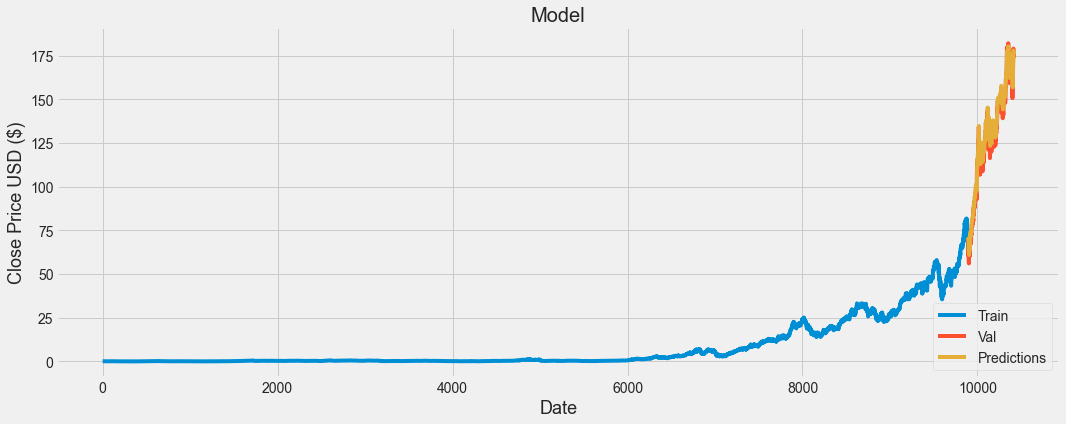

In [27]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [9]:
model.save("basiclstm-1epoch.h5")

In [28]:
from tensorflow import keras
yActual = y_test
yPredicted = predictions
 
mapeObject = keras.losses.MeanAbsolutePercentageError()
mapeTensor = mapeObject(yActual, yPredicted)
mape = mapeTensor.numpy()
 
print(mape)

2.8585024
